In [14]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [2]:
warbat = pd.read_csv('/Users/anthonyzippay/Desktop/war_daily_bat.csv')

In [3]:
warbat.head()

,name_common,age,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,PA,G,...,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,OPS_plus,TOB_lg,TB_lg
0,David Aardsma,22.0,430911.0,aardsda01,2004,SFG,1,NL,0.0,11,...,4.67092,1.890,1.890,0.500,0.500,0.5,0.5000,NaN,0.000,0.000
1,David Aardsma,24.0,430911.0,aardsda01,2006,CHC,1,NL,3.0,43,...,4.86457,1.912,1.913,0.499,0.499,0.5,0.4998,-100.0,0.694,0.896
2,David Aardsma,25.0,430911.0,aardsda01,2007,CHW,1,AL,0.0,2,...,4.85895,1.912,1.912,0.500,0.500,0.5,0.5000,NaN,0.000,0.000
3,David Aardsma,26.0,430911.0,aardsda01,2008,BOS,1,AL,1.0,5,...,4.69650,1.893,1.894,0.497,0.497,0.5,0.4992,-100.0,0.345,0.434
4,David Aardsma,27.0,430911.0,aardsda01,2009,SEA,1,AL,0.0,3,...,4.79788,1.905,1.905,0.500,0.500,0.5,0.5000,NaN,0.000,0.000


In [4]:
warbat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107049 entries, 0 to 107048
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name_common         107049 non-null  object 
 1   age                 106896 non-null  float64
 2   mlb_ID              107001 non-null  float64
 3   player_ID           107049 non-null  object 
 4   year_ID             107049 non-null  int64  
 5   team_ID             107049 non-null  object 
 6   stint_ID            107049 non-null  int64  
 7   lg_ID               106313 non-null  object 
 8   PA                  106880 non-null  float64
 9   G                   107049 non-null  int64  
 10  Inn                 70792 non-null   float64
 11  runs_bat            107049 non-null  float64
 12  runs_br             107049 non-null  float64
 13  runs_dp             107049 non-null  float64
 14  runs_field          107049 non-null  float64
 15  runs_infield        70792 non-null

In [5]:
warbat.dropna(inplace=True)

In [6]:
for col in warbat.columns: 
    print(col)

name_common
age
mlb_ID
player_ID
year_ID
team_ID
stint_ID
lg_ID
PA
G
Inn
runs_bat
runs_br
runs_dp
runs_field
runs_infield
runs_outfield
runs_catcher
runs_good_plays
runs_defense
runs_position
runs_position_p
runs_replacement
runs_above_rep
runs_above_avg
runs_above_avg_off
runs_above_avg_def
WAA
WAA_off
WAA_def
WAR
WAR_def
WAR_off
WAR_rep
salary
pitcher
teamRpG
oppRpG
oppRpPA_rep
oppRpG_rep
pyth_exponent
pyth_exponent_rep
waa_win_perc
waa_win_perc_off
waa_win_perc_def
waa_win_perc_rep
OPS_plus
TOB_lg
TB_lg


In [7]:
warbat1 = warbat[['WAR', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary']]

In [8]:
warbat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10891 entries, 3 to 107014
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WAR      10891 non-null  float64
 1   WAR_def  10891 non-null  float64
 2   WAR_off  10891 non-null  float64
 3   WAR_rep  10891 non-null  float64
 4   salary   10891 non-null  float64
dtypes: float64(5)
memory usage: 510.5 KB


In [9]:
warbat1.corr()

,WAR,WAR_def,WAR_off,WAR_rep,salary
WAR,1.000000,0.369384,0.932937,0.698884,0.194857
WAR_def,0.369384,1.000000,0.061076,0.034895,-0.116321
WAR_off,0.932937,0.061076,1.000000,0.747398,0.233491
WAR_rep,0.698884,0.034895,0.747398,1.000000,0.188674
salary,0.194857,-0.116321,0.233491,0.188674,1.000000


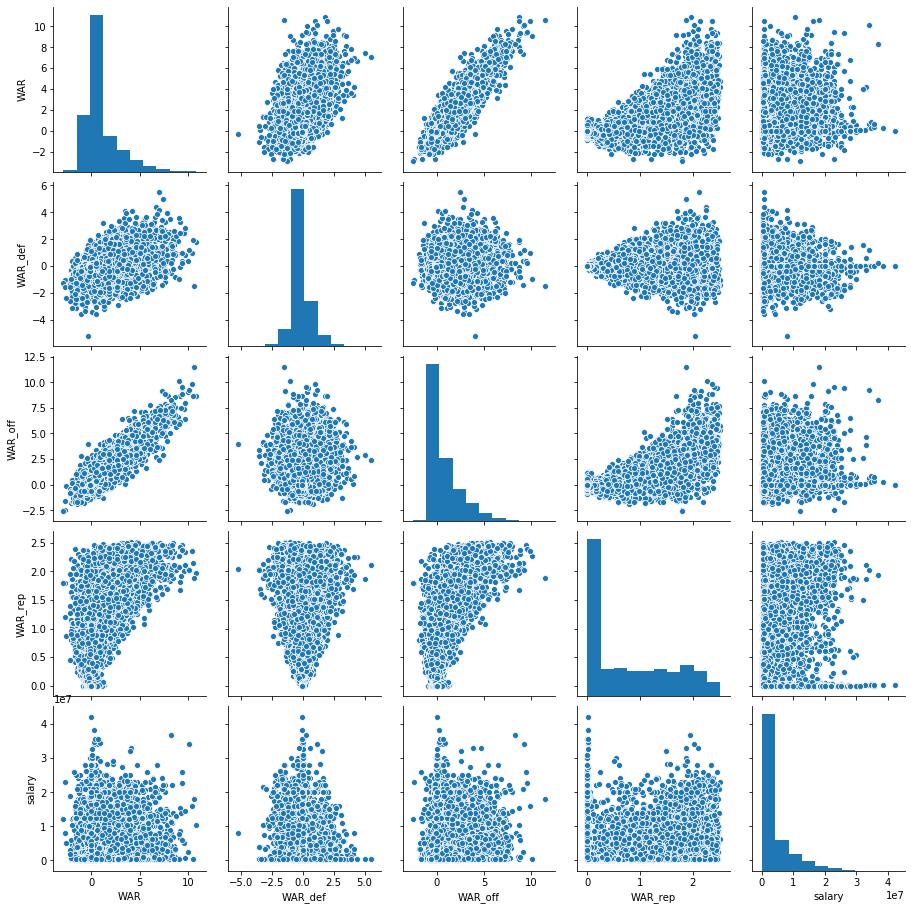

In [10]:
sns.pairplot(warbat1)

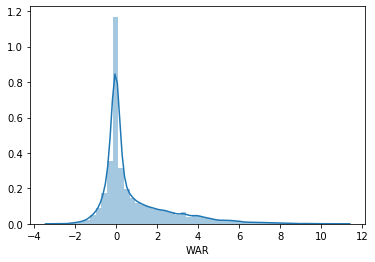

In [11]:
sns.distplot(warbat1["WAR"])

TypeError: 'AxesSubplot' object is not subscriptable

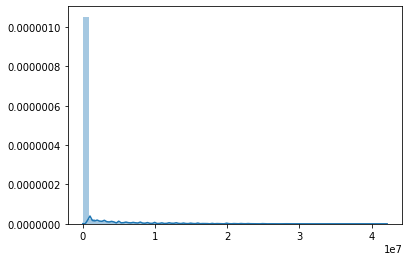

In [12]:
sns.distplot(warbat1)["salary"]

In [16]:
stats.ttest_rel(warbat1['salary'], warbat1['WAR'])

Ttest_relResult(statistic=77.30480365433998, pvalue=0.0)

In [17]:
warbat1.head()

,WAR,WAR_def,WAR_off,WAR_rep,salary
3,-0.02,0.00,-0.02,0.00,403250.0
54,-0.02,0.00,-0.02,0.02,327000.0
57,-0.05,0.01,-0.05,0.00,485000.0
156,-0.74,-0.35,-0.34,0.84,327000.0
163,-0.03,0.11,-0.13,0.03,300000.0
